In [ ]:
from sklearn.datasets import fetch_20newsgroups
df = fetch_20newsgroups(subset='train')
print(list(df.target_names))


['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
len(df.target_names)

20

**Question 1.** Download and load the dataset.

In [ ]:
import pandas as pd

In [ ]:
dataset= fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)
df = pd.DataFrame()
df['text'] = dataset.data
df['source'] = dataset.target
label=[]
for i in df['source']:
    label.append(dataset.target_names[i])
df['label']=label

In [ ]:
df['text']

0        I was wondering if anyone out there could enli...
1        A fair number of brave souls who upgraded thei...
2        well folks, my mac plus finally gave up the gh...
3        \nDo you have Weitek's address/phone number?  ...
4        From article <C5owCB.n3p@world.std.com>, by to...
                               ...                        
11309    DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
11310    I have a (very old) Mac 512k and a Mac Plus, b...
11311    I just installed a DX2-66 CPU in a clone mothe...
11312    \nWouldn't this require a hyper-sphere.  In 3-...
11313    Stolen from Pasadena between 4:30 and 6:30 pm ...
Name: text, Length: 11314, dtype: object

**Question** **2.** Apply Preprocessing techniques- stemming/lemmatization, stopwords removal,
lowercasing, removing non-alphanumeric characters, special characters, etc.
using any NLP library (SpaCy, etc.)

In [ ]:
df_new = df['text']
df_new


0        I was wondering if anyone out there could enli...
1        A fair number of brave souls who upgraded thei...
2        well folks, my mac plus finally gave up the gh...
3        \nDo you have Weitek's address/phone number?  ...
4        From article <C5owCB.n3p@world.std.com>, by to...
                               ...                        
11309    DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
11310    I have a (very old) Mac 512k and a Mac Plus, b...
11311    I just installed a DX2-66 CPU in a clone mothe...
11312    \nWouldn't this require a hyper-sphere.  In 3-...
11313    Stolen from Pasadena between 4:30 and 6:30 pm ...
Name: text, Length: 11314, dtype: object

In [ ]:
df_new = df_new.to_string()

Preprocessing : lowercasing of data , remove punctuations and others

In [ ]:
import re
import string
puncs = string.punctuation
print(puncs)
def preprocess(dataset):
    dataset = dataset.lower()
    dataset = dataset.strip()
    dataset = re.sub(r'(From:\s+[^\n]+\n)', '', dataset)
    dataset= re.sub(r'(Subject:[^\n]+\n)', '', dataset)
    dataset = re.sub(re.compile(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'), '', dataset)
    dataset = re.sub(f'[{re.escape(string.punctuation)}]', '', dataset)
    dataset = re.sub(r'(\d+)', ' ', dataset)
    dataset = re.sub(r'(\s+)', ' ', dataset)
    return dataset

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
df['preprocessed'] = df['text'].apply(preprocess)
text = df['preprocessed']
text



0        i was wondering if anyone out there could enli...
1        a fair number of brave souls who upgraded thei...
2        well folks my mac plus finally gave up the gho...
3        do you have weiteks addressphone number id lik...
4        from article c owcbn pworldstdcom by tombakerw...
                               ...                        
11309    dn from nyedacnsvaxuwecedu david nye dn a neur...
11310    i have a very old mac k and a mac plus both of...
11311    i just installed a dx cpu in a clone motherboa...
11312    wouldnt this require a hypersphere in space po...
11313    stolen from pasadena between and pm on blue an...
Name: preprocessed, Length: 11314, dtype: object

In [ ]:
text.dtypes

dtype('O')

Removing stop words and word tokenizing

In [ ]:
import spacy ,en_core_web_sm
en_core = spacy.load('en_core_web_sm')
nlp = spacy.load('en')

In [ ]:
#nlp = English()
text = text.to_string()
doc = nlp(text)
doc

0        i was wondering if anyone out there could enli...
1        a fair number of brave souls who upgraded thei...
2        well folks my mac plus finally gave up the gho...
3        do you have weiteks addressphone number id lik...
4        from article c owcbn pworldstdcom by tombakerw...
5        of course the term must be rigidly defined in ...
6        there were a few people who responded to my re...
7        all this shows is that you dont know much abou...
8        i have win and downloaded several icons and bm...
9        ive had the board for over a year and it does ...
10       i have a line on a ducati gts model with k on ...
11       yep thats pretty much it im not a jew but i un...
12                                                        
13       description of external tank option for ssf re...
14       reduced prices i have a list of things forsale...
15       dont be so sure look what happened to japanese...
16       i certainly do use it whenever i have to do ti.

In [ ]:
# Create list of word tokens
token_list = []
for token in doc:
    token_list.append(token.text)

from spacy.lang.en.stop_words import STOP_WORDS

# Create list of word tokens after removing stopwords
filtered_sentence =[]

for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_sentence.append(word)
print(token_list)
print(filtered_sentence)

['0', '       ', 'i', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enli', '...', '\n', '1', '       ', 'a', 'fair', 'number', 'of', 'brave', 'souls', 'who', 'upgraded', 'thei', '...', '\n', '2', '       ', 'well', 'folks', 'my', 'mac', 'plus', 'finally', 'gave', 'up', 'the', 'gho', '...', '\n', '3', '       ', 'do', 'you', 'have', 'weiteks', 'addressphone', 'number', 'i', 'd', 'lik', '...', '\n', '4', '       ', 'from', 'article', 'c', 'owcbn', 'pworldstdcom', 'by', 'tombakerw', '...', '\n', '5', '       ', 'of', 'course', 'the', 'term', 'must', 'be', 'rigidly', 'defined', 'in', '...', '\n', '6', '       ', 'there', 'were', 'a', 'few', 'people', 'who', 'responded', 'to', 'my', 're', '...', '\n', '7', '       ', 'all', 'this', 'shows', 'is', 'that', 'you', 'do', 'nt', 'know', 'much', 'abou', '...', '\n', '8', '       ', 'i', 'have', 'win', 'and', 'downloaded', 'several', 'icons', 'and', 'bm', '...', '\n', '9', '       ', 'i', 've', 'had', 'the', 'board', 'for', 'over', 

In [ ]:
filtered_sentence

['0',
 '       ',
 'wondering',
 'enli',
 '...',
 '\n',
 '1',
 '       ',
 'fair',
 'number',
 'brave',
 'souls',
 'upgraded',
 'thei',
 '...',
 '\n',
 '2',
 '       ',
 'folks',
 'mac',
 'plus',
 'finally',
 'gave',
 'gho',
 '...',
 '\n',
 '3',
 '       ',
 'weiteks',
 'addressphone',
 'number',
 'd',
 'lik',
 '...',
 '\n',
 '4',
 '       ',
 'article',
 'c',
 'owcbn',
 'pworldstdcom',
 'tombakerw',
 '...',
 '\n',
 '5',
 '       ',
 'course',
 'term',
 'rigidly',
 'defined',
 '...',
 '\n',
 '6',
 '       ',
 'people',
 'responded',
 '...',
 '\n',
 '7',
 '       ',
 'shows',
 'nt',
 'know',
 'abou',
 '...',
 '\n',
 '8',
 '       ',
 'win',
 'downloaded',
 'icons',
 'bm',
 '...',
 '\n',
 '9',
 '       ',
 've',
 'board',
 'year',
 '...',
 '\n',
 '10',
 '      ',
 'line',
 'ducati',
 'gts',
 'model',
 'k',
 '...',
 '\n',
 '11',
 '      ',
 'yep',
 's',
 'pretty',
 'm',
 'jew',
 'un',
 '...',
 '\n',
 '12',
 '                                                       \n',
 '13',
 '      ',
 'd

In [ ]:
sentences = " ".join(filtered_sentence)
sentences

'0         wondering enli ... \n 1         fair number brave souls upgraded thei ... \n 2         folks mac plus finally gave gho ... \n 3         weiteks addressphone number d lik ... \n 4         article c owcbn pworldstdcom tombakerw ... \n 5         course term rigidly defined ... \n 6         people responded ... \n 7         shows nt know abou ... \n 8         win downloaded icons bm ... \n 9         ve board year ... \n 10        line ducati gts model k ... \n 11        yep s pretty m jew un ... \n 12                                                        \n 13        description external tank option ssf ... \n 14        reduced prices list things forsale ... \n 15        nt sure look happened japanese ... \n 16        certainly use ti ... \n 17        recently posted article asking kind ... \n 18        like able amplify voltage s ... \n 19        question exact entry parameter ... \n 20         nt like little things l ... \n 21        think mike foligno captain t ... \n 22    

Lemmatization

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()
# Tokenize: Split the sentence into words
words = nltk.word_tokenize(sentences)

words

['0',
 'wondering',
 'enli',
 '...',
 '1',
 'fair',
 'number',
 'brave',
 'souls',
 'upgraded',
 'thei',
 '...',
 '2',
 'folks',
 'mac',
 'plus',
 'finally',
 'gave',
 'gho',
 '...',
 '3',
 'weiteks',
 'addressphone',
 'number',
 'd',
 'lik',
 '...',
 '4',
 'article',
 'c',
 'owcbn',
 'pworldstdcom',
 'tombakerw',
 '...',
 '5',
 'course',
 'term',
 'rigidly',
 'defined',
 '...',
 '6',
 'people',
 'responded',
 '...',
 '7',
 'shows',
 'nt',
 'know',
 'abou',
 '...',
 '8',
 'win',
 'downloaded',
 'icons',
 'bm',
 '...',
 '9',
 've',
 'board',
 'year',
 '...',
 '10',
 'line',
 'ducati',
 'gts',
 'model',
 'k',
 '...',
 '11',
 'yep',
 's',
 'pretty',
 'm',
 'jew',
 'un',
 '...',
 '12',
 '13',
 'description',
 'external',
 'tank',
 'option',
 'ssf',
 '...',
 '14',
 'reduced',
 'prices',
 'list',
 'things',
 'forsale',
 '...',
 '15',
 'nt',
 'sure',
 'look',
 'happened',
 'japanese',
 '...',
 '16',
 'certainly',
 'use',
 'ti',
 '...',
 '17',
 'recently',
 'posted',
 'article',
 'asking',
 'k

In [ ]:
# Lemmatize list of words and join
lemma = ' '.join([lemmatizer.lemmatize(w) for w in words])
print(lemma)

0 wondering enli ... 1 fair number brave soul upgraded thei ... 2 folk mac plus finally gave gho ... 3 weiteks addressphone number d lik ... 4 article c owcbn pworldstdcom tombakerw ... 5 course term rigidly defined ... 6 people responded ... 7 show nt know abou ... 8 win downloaded icon bm ... 9 ve board year ... 10 line ducati gts model k ... 11 yep s pretty m jew un ... 12 13 description external tank option ssf ... 14 reduced price list thing forsale ... 15 nt sure look happened japanese ... 16 certainly use ti ... 17 recently posted article asking kind ... 18 like able amplify voltage s ... 19 question exact entry parameter ... 20 nt like little thing l ... 21 think mike foligno captain t ... 22 catalog personal computing tool e ... 23 control box window upper lef ... 24 nt know specific problem mention ... 25 hello looking add voice input capabili ... 26 actually fossil fuel plant run hotter th ... 27 doug robert ken hill nl mvp let spos 28 yes adamantly environmentalist ... 29 d

In [ ]:
lemma_text = lemma.split('...')
lemma_text

['0 wondering enli ',
 ' 1 fair number brave soul upgraded thei ',
 ' 2 folk mac plus finally gave gho ',
 ' 3 weiteks addressphone number d lik ',
 ' 4 article c owcbn pworldstdcom tombakerw ',
 ' 5 course term rigidly defined ',
 ' 6 people responded ',
 ' 7 show nt know abou ',
 ' 8 win downloaded icon bm ',
 ' 9 ve board year ',
 ' 10 line ducati gts model k ',
 ' 11 yep s pretty m jew un ',
 ' 12 13 description external tank option ssf ',
 ' 14 reduced price list thing forsale ',
 ' 15 nt sure look happened japanese ',
 ' 16 certainly use ti ',
 ' 17 recently posted article asking kind ',
 ' 18 like able amplify voltage s ',
 ' 19 question exact entry parameter ',
 ' 20 nt like little thing l ',
 ' 21 think mike foligno captain t ',
 ' 22 catalog personal computing tool e ',
 ' 23 control box window upper lef ',
 ' 24 nt know specific problem mention ',
 ' 25 hello looking add voice input capabili ',
 ' 26 actually fossil fuel plant run hotter th ',
 ' 27 doug robert ken hill nl m

In [ ]:
len(lemma_text)

10697

STEMMING

In [ ]:
from nltk.stem import PorterStemmer

pr = PorterStemmer()
stemmed_tokens = pr.stem(sentences)
stemmed_tokens

'0         wondering enli ... \n 1         fair number brave souls upgraded thei ... \n 2         folks mac plus finally gave gho ... \n 3         weiteks addressphone number d lik ... \n 4         article c owcbn pworldstdcom tombakerw ... \n 5         course term rigidly defined ... \n 6         people responded ... \n 7         shows nt know abou ... \n 8         win downloaded icons bm ... \n 9         ve board year ... \n 10        line ducati gts model k ... \n 11        yep s pretty m jew un ... \n 12                                                        \n 13        description external tank option ssf ... \n 14        reduced prices list things forsale ... \n 15        nt sure look happened japanese ... \n 16        certainly use ti ... \n 17        recently posted article asking kind ... \n 18        like able amplify voltage s ... \n 19        question exact entry parameter ... \n 20         nt like little things l ... \n 21        think mike foligno captain t ... \n 22    

In [ ]:
text1 = stemmed_tokens.split('\n')
text1

['0         wondering enli ... ',
 ' 1         fair number brave souls upgraded thei ... ',
 ' 2         folks mac plus finally gave gho ... ',
 ' 3         weiteks addressphone number d lik ... ',
 ' 4         article c owcbn pworldstdcom tombakerw ... ',
 ' 5         course term rigidly defined ... ',
 ' 6         people responded ... ',
 ' 7         shows nt know abou ... ',
 ' 8         win downloaded icons bm ... ',
 ' 9         ve board year ... ',
 ' 10        line ducati gts model k ... ',
 ' 11        yep s pretty m jew un ... ',
 ' 12                                                        ',
 ' 13        description external tank option ssf ... ',
 ' 14        reduced prices list things forsale ... ',
 ' 15        nt sure look happened japanese ... ',
 ' 16        certainly use ti ... ',
 ' 17        recently posted article asking kind ... ',
 ' 18        like able amplify voltage s ... ',
 ' 19        question exact entry parameter ... ',
 ' 20         nt like little things 

Removing alphanumeric charaters

In [ ]:
import re
text = re.sub("[^a-zA-Z0-9]+", " ",text)

**Question 3.** Generate vector representations for news documents.
Train your own embedding model using Word2Vec and generate document
vectors. You are free to make your own assumptions (such as averaging all word
vectors, etc.). Provide in-depth analysis of the result using Word2Vec.

WORD2VEC

A word2vec model is a simple neural network model with a single hidden layer. The task of this model is to predict the nearby words for each and every word in a sentence

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

news=list()

for line in text1:
    tokens = word_tokenize(line)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    strip = [w.translate(table) for w in tokens]
    words = [word for word in strip if word.isalpha()]
    #stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in lemma_text]
    news.append(words)

In [ ]:
news

[['wondering', 'enli'],
 ['fair', 'number', 'brave', 'souls', 'upgraded', 'thei'],
 ['folks', 'mac', 'plus', 'finally', 'gave', 'gho'],
 ['weiteks', 'addressphone', 'number', 'd', 'lik'],
 ['article', 'c', 'owcbn', 'pworldstdcom', 'tombakerw'],
 ['course', 'term', 'rigidly', 'defined'],
 ['people', 'responded'],
 ['shows', 'nt', 'know', 'abou'],
 ['win', 'downloaded', 'icons', 'bm'],
 ['ve', 'board', 'year'],
 ['line', 'ducati', 'gts', 'model', 'k'],
 ['yep', 's', 'pretty', 'm', 'jew', 'un'],
 [],
 ['description', 'external', 'tank', 'option', 'ssf'],
 ['reduced', 'prices', 'list', 'things', 'forsale'],
 ['nt', 'sure', 'look', 'happened', 'japanese'],
 ['certainly', 'use', 'ti'],
 ['recently', 'posted', 'article', 'asking', 'kind'],
 ['like', 'able', 'amplify', 'voltage', 's'],
 ['question', 'exact', 'entry', 'parameter'],
 ['nt', 'like', 'little', 'things', 'l'],
 ['think', 'mike', 'foligno', 'captain', 't'],
 ['catalog', 'personal', 'computing', 'tools', 'e'],
 ['control', 'box', 'wi

In [ ]:

import gensim

In [ ]:
model = gensim.models.Word2Vec(sentences=news, window=5, workers=4, min_count=5)
model

In [ ]:
words = list(model.wv.vocab)

In [ ]:

print('Vocab: %d' % len(words))

Vocab: 1772


In [ ]:
words

['wondering',
 'fair',
 'number',
 'upgraded',
 'folks',
 'mac',
 'plus',
 'finally',
 'gave',
 'd',
 'lik',
 'article',
 'c',
 'course',
 'term',
 'defined',
 'people',
 'responded',
 'shows',
 'nt',
 'know',
 'abou',
 'win',
 've',
 'board',
 'year',
 'line',
 'model',
 'k',
 'yep',
 's',
 'pretty',
 'm',
 'un',
 'description',
 'external',
 'tank',
 'option',
 'reduced',
 'prices',
 'list',
 'things',
 'forsale',
 'sure',
 'look',
 'happened',
 'japanese',
 'certainly',
 'use',
 'ti',
 'recently',
 'posted',
 'asking',
 'kind',
 'like',
 'able',
 'question',
 'exact',
 'little',
 'l',
 'think',
 'mike',
 'captain',
 't',
 'personal',
 'e',
 'control',
 'box',
 'window',
 'specific',
 'problem',
 'mention',
 'hello',
 'looking',
 'add',
 'voice',
 'actually',
 'fuel',
 'run',
 'th',
 'doug',
 'mvp',
 'lets',
 'yes',
 'depends',
 'lot',
 'available',
 'sony',
 'yo',
 'son',
 'usual',
 'possible',
 'interest',
 'define',
 'war',
 'appears',
 'man',
 'funny',
 'time',
 'oh',
 'boy',
 'a

Document vectors


In [ ]:
import numpy as np
document_vectors=np.mean(model[words],axis=0)
document_vectors

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



array([ 0.00057903, -0.00609496,  0.0133675 ,  0.01142409,  0.00355018,
       -0.01225957,  0.01766565,  0.01596422,  0.01238495, -0.01214457,
       -0.00212575,  0.00918389, -0.01154773, -0.00224674, -0.00336431,
       -0.00010507, -0.0159794 ,  0.01284563,  0.00251662, -0.03546109,
       -0.02614375, -0.01346352,  0.00345488,  0.00540329,  0.00728635,
       -0.00727167,  0.00400981,  0.03209274, -0.0091457 , -0.00988257,
       -0.02321668, -0.00991118, -0.00379706, -0.00710372,  0.01613571,
        0.00045925,  0.0085508 , -0.00099581, -0.00562449,  0.01030375,
       -0.00574175,  0.01503778, -0.0028384 , -0.00239341,  0.03644729,
       -0.00484894, -0.00889479,  0.00604332, -0.00686971,  0.02002828,
        0.01222402, -0.02507315, -0.03630421, -0.00503471, -0.00267397,
        0.0038814 , -0.00899523,  0.01124147,  0.00162747,  0.01139164,
       -0.01140484, -0.0009945 , -0.00031354, -0.01513416,  0.00775871,
        0.0061644 ,  0.00674033, -0.00019802, -0.00846429,  0.00

**Question 4.** Apply any one Clustering technique ( KNN, HAC, DBSCAN, HDBSCAN, etc.) on
document vectors generated in step 3.

In [ ]:
X = document_vectors.reshape(-1,1)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)
dist

array([[0., 2., 0., ..., 2., 2., 0.],
       [2., 0., 2., ..., 0., 0., 2.],
       [0., 2., 0., ..., 2., 2., 0.],
       ...,
       [2., 0., 2., ..., 0., 0., 2.],
       [2., 0., 2., ..., 0., 0., 2.],
       [0., 2., 0., ..., 2., 2., 0.]], dtype=float32)

clustering

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
## Standardizing the data
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(100, 1)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(standardized_data)
print(y_kmeans5)

kmeans5.cluster_centers_

[1 4 3 3 1 4 3 3 3 4 1 3 4 1 1 1 4 3 1 0 0 4 1 1 3 4 1 2 4 4 0 4 1 4 3 1 3
 1 4 3 4 3 1 1 2 4 4 3 4 3 3 0 0 4 1 1 4 3 1 3 4 1 1 4 3 3 3 1 4 1 4 3 4 0
 4 3 4 3 1 1 1 2 3 3 3 4 3 1 4 0 3 4 1 1 1 4 3 4 1 1]


array([[-2.1569736 ],
       [ 0.07853554],
       [ 2.6110735 ],
       [ 0.9092701 ],
       [-0.7179279 ]], dtype=float32)

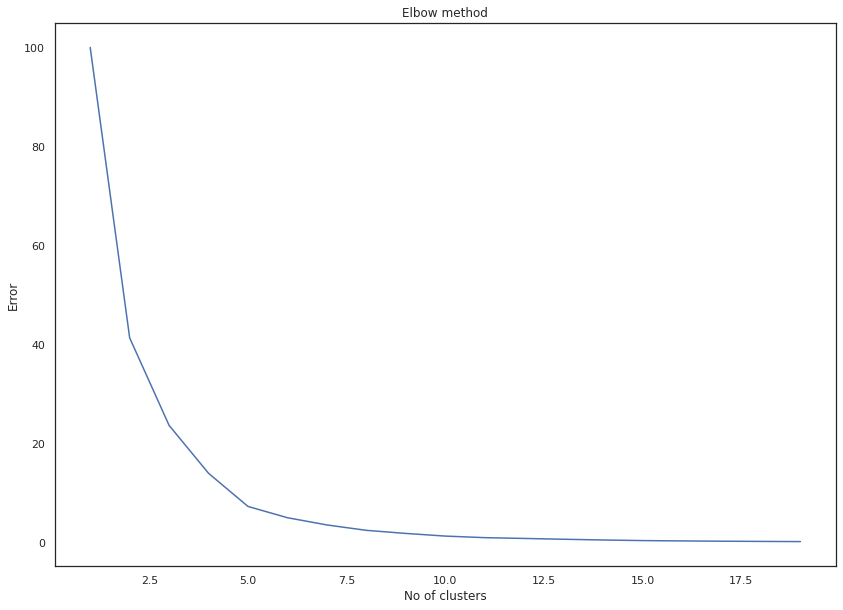

In [ ]:
Error =[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i).fit(standardized_data)
    kmeans.fit(standardized_data)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 20), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters=20)
y_kmeans3 = kmeans3.fit_predict(standardized_data)
print(y_kmeans3)

[ 0  6  7  7  8  1  2  2  7  1 14 17  1 14 14  0 11  7 18  9  3  1  8 16
  5  6  8 19 12 12 13 12 14  6  2  0 17  0  6 17  6  2 14 14  4  6 12 16
  6 15  7  3  9  6 14  8 12  7 18  7  1  0  0 11  5 16  5  0 12 18  6  7
 11  3 12  5 11  2  0 14 18 10 17  5 16 12  5  0 11 13 17 12 18 16 18  1
  5  6 14  0]


5. Visualize the clusters using techniques such as (t-SNE / Embedding projector)
and evaluate the quality of resulting clusters.

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.

In [ ]:

# For plotting
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.manifold import TSNE

In [ ]:
## Standardizing the data
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(100, 1)


In [ ]:
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(X)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


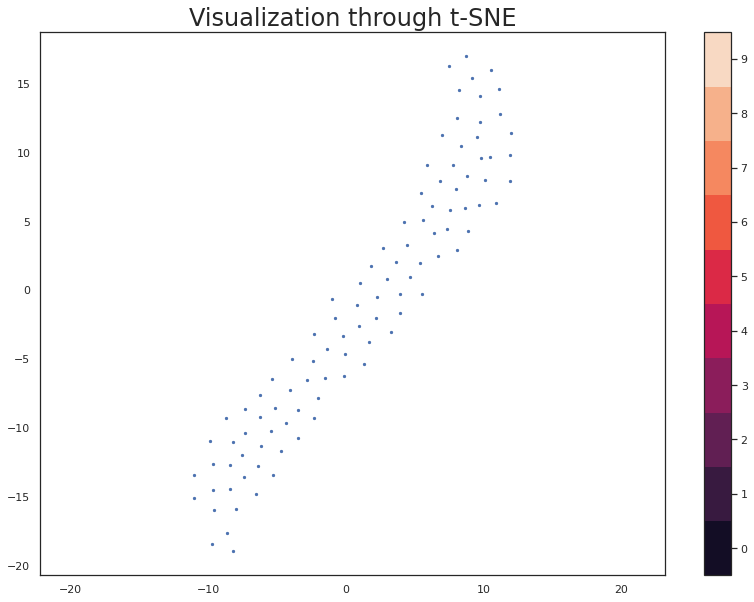

In [ ]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualization through t-SNE', fontsize=24);

Bonus question:
● Compare your trained model with other models trained using Glove and Fasttext
State your observations, inferences and conclusions.

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-06-19 15:59:00--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-06-19 15:59:00--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-06-19 15:59:00--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
%ls

glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip    sample_data/
glove.6B.200d.txt  glove.6B.50d.txt   glove.6B.zip.1


In [ ]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(news)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(news)


In [ ]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[  134  5033     0     0]
 [ 2251  5034  1436  5035]
 [  399   352   593  3111]
 ...
 [  147  1384  2219 12844]
 [  583 12845   209   395]
 [12846 12847  1366   926]]


In [ ]:
embeddings_index = dict()

In [ ]:
f = open('glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [ ]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [ ]:
#Creating Model Using GloVe Embedding
# define model
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 100)            1284800   
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 401       
Total params: 1,285,201
Trainable params: 401
Non-trainable params: 1,284,800
_________________________________________________________________
None


Observations : Word2Vec takes texts as training data for a neural network. The resulting embedding captures whether words appear in similar contexts. GloVe focuses on words co-occurrences over the whole corpus. Its embeddings relate to the probabilities that two words appear together.